In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

In [50]:
'''# Load the Boston Housing dataset
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=42)'''
import pandas as pd

# Define column names for the 13 features and target
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
# Create DataFrame for the full training data
train_df = pd.DataFrame(x_train_full, columns=feature_names)
train_df['MEDV'] = y_train_full  # Add target column (median house price)

# Display the first 5 rows
print("Training Data (first 5 rows):")
print(train_df.head())

# Optionally, create DataFrame for test data
test_df = pd.DataFrame(x_test, columns=feature_names)
test_df['MEDV'] = y_test
print("\nTest Data (first 5 rows):")
print(test_df.head())




Training Data (first 5 rows):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   
1  0.05644  40.0   6.41   1.0  0.447  6.758  32.9  4.0776   4.0  254.0   
2  0.10574   0.0  27.74   0.0  0.609  5.983  98.8  1.8681   4.0  711.0   
3  0.09164   0.0  10.81   0.0  0.413  6.065   7.8  5.2873   4.0  305.0   
4  5.09017   0.0  18.10   0.0  0.713  6.297  91.8  2.3682  24.0  666.0   

   PTRATIO       B  LSTAT  MEDV  
0     16.6  395.50   9.04  23.6  
1     17.6  396.90   3.53  32.4  
2     20.1  390.11  18.07  13.6  
3     19.2  390.91   5.52  22.8  
4     20.2  385.09  17.27  16.1  

Test Data (first 5 rows):
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.21719   0.0  10.59   1.0  0.489  5.807  53.8  3.6526   4.0  277.0   
1  0.12932   0.0  13.92   0.0  0.437  6.678  31.1  5.9604   4.0  289.0   
2  6.65492   0.0  18.10   0.0  0.713  6.317  83.0  2.7344  24.0  666.0  

In [52]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

In [54]:
# Standardize the features (but not the target)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [56]:
# Define the regression metrics display function
def regression_metrics_display(y_true, y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE is {metrics.mean_squared_error(y_true, y_pred):.2f}")
    print(f"R2 score is {metrics.r2_score(y_true, y_pred):.2f}")

In [58]:
# Build the Deep Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),  # 13 features
    tf.keras.layers.Dense(100, activation='relu', name='hidden-layer-1'),
    tf.keras.layers.BatchNormalization(name='batch-norm-1'),
    tf.keras.layers.Dense(50, activation='relu', name='hidden-layer-2'),
    tf.keras.layers.Dense(1, name='output-layer')  # No activation for linear regression
])

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [62]:
# Train the model
history = model.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(x_val_scaled, y_val), verbose=1)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 556.3216 - mae: 21.7957 - val_loss: 556.1841 - val_mae: 21.8719
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 444.3006 - mae: 19.6679 - val_loss: 521.0518 - val_mae: 21.1628
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 412.8926 - mae: 18.7265 - val_loss: 477.0784 - val_mae: 20.2435
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 320.0067 - mae: 16.2412 - val_loss: 423.8839 - val_mae: 19.0526
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 238.6219 - mae: 13.6636 - val_loss: 365.8346 - val_mae: 17.6224
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 210.8033 - mae: 12.0453 - val_loss: 302.8069 - val_mae: 15.8980
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 140.8402 - mae: 9.3593 - val_loss: 249.1223 - val_mae: 14.2438
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 103.8151 - mae: 7.8608 - val_loss: 210.6470 - val_mae: 12.9261
Epoch 9/100
11/11

In [63]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"\nTest Mean Absolute Error: {test_mae:.2f} thousand dollars")


Test Mean Absolute Error: 2.87 thousand dollars


In [64]:

# Make predictions
y_pred = model.predict(x_test_scaled, verbose=0).flatten()  # Flatten to match y_test shape


In [65]:
# Display regression metrics
print("\nRegression Metrics on Test Set:")
regression_metrics_display(y_test, y_pred)


Regression Metrics on Test Set:
MAE is 2.87
MSE is 14.29
R2 score is 0.80


In [66]:
# Print sample predictions
print("\nSample Predictions (Predicted vs Actual):")
for i in range(5):
    print(f"Sample {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}")


Sample Predictions (Predicted vs Actual):
Sample 1: Predicted = 17.94, Actual = 22.40
Sample 2: Predicted = 26.40, Actual = 28.60
Sample 3: Predicted = 18.00, Actual = 19.50
Sample 4: Predicted = 26.14, Actual = 24.80
Sample 5: Predicted = 23.18, Actual = 24.50


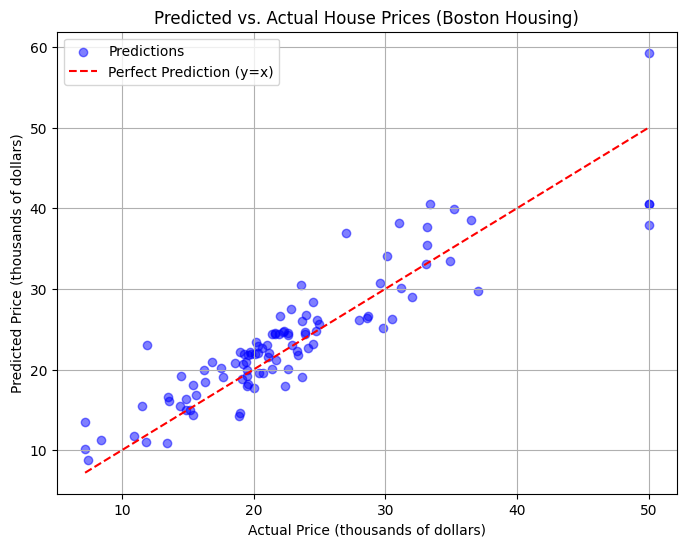

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are available from the DNN model
# If not, they can be generated using the previous code:
# y_pred = model.predict(x_test_scaled, verbose=0).flatten()

# Scatter Plot: Predicted vs. Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Predicted Price (thousands of dollars)')
plt.title('Predicted vs. Actual House Prices (Boston Housing)')
plt.legend()
plt.grid(True)
plt.show()


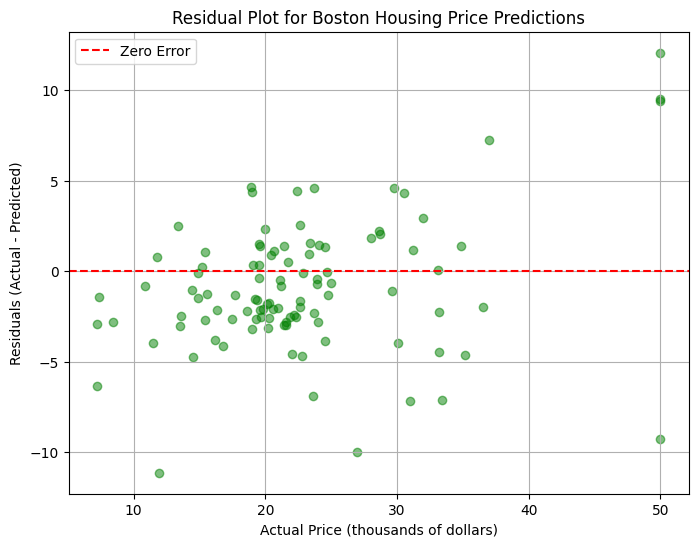

In [68]:
# Residual Plot: Errors vs. Actual Prices
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')
plt.xlabel('Actual Price (thousands of dollars)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Boston Housing Price Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
import pandas as pd

# Define feature names
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Convert training features and target to DataFrame
train_df = pd.DataFrame(x_train_full, columns=feature_names)
train_df['MEDV'] = y_train_full  # Add target column

# View the first 5 rows
print(train_df.head(100))

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0    0.09178   0.0   4.05   0.0  0.510  6.416   84.1  2.6463   5.0  296.0   
1    0.05644  40.0   6.41   1.0  0.447  6.758   32.9  4.0776   4.0  254.0   
2    0.10574   0.0  27.74   0.0  0.609  5.983   98.8  1.8681   4.0  711.0   
3    0.09164   0.0  10.81   0.0  0.413  6.065    7.8  5.2873   4.0  305.0   
4    5.09017   0.0  18.10   0.0  0.713  6.297   91.8  2.3682  24.0  666.0   
..       ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
95   0.59005   0.0  21.89   0.0  0.624  6.372   97.9  2.3274   4.0  437.0   
96   9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
97  18.81100   0.0  18.10   0.0  0.597  4.628  100.0  1.5539  24.0  666.0   
98  14.42080   0.0  18.10   0.0  0.740  6.461   93.3  2.0026  24.0  666.0   
99  14.05070   0.0  18.10   0.0  0.597  6.657  100.0  1.5275  24.0  666.0   

    PTRATIO       B  LSTAT  MEDV  
0      16.6  395.50   9.04  23.6  
1    